## Load packages

In [59]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

## Download dataset

In [60]:
!wget -nc "http://cedric.cnam.fr/~thomen/cours/US330X/fleurs_mal.txt"

File ‘fleurs_mal.txt’ already there; not retrieving.



In [61]:
!ls

fleurs_mal.txt	sample_data


## Data Preprocessing

In [ ]:
with open("/content/fleurs_mal.txt", 'r', encoding = "utf-8") as f:
  parag= f.readlines()

# Sélectionner le texte à partir de la ligne 242
parag = " ".join(parag[239:])  # L'indexation commence à 0, donc 241 correspond à la ligne 242



###  Convertir le texte en minuscules et enlever les caractères spéciaux

In [ ]:
# Convertir le texte en minuscules et enlever les caractères spéciaux
parag = parag.lower().replace('\n', ' ').replace('\r', '').replace(',', ' ,').replace('.', ' .').replace(';', ' ;').replace('!', ' !').replace('?', ' ?')

In [ ]:
parag

### Corpus

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([parag])
total_words = len(tokenizer.word_index) + 1
total_words

6848

In [ ]:
tokenizer.index_word[4]

'la'

In [ ]:
print(tokenizer.texts_to_sequences([parag.split('.')[0]]))

[[2587, 46, 42, 273, 28, 5, 112, 15, 142, 131, 342, 126, 74, 273, 127, 117, 14, 236, 28, 617, 1552, 218, 301, 1056, 53, 75, 1553, 301, 1554, 1555]]


In [ ]:
# Créer des séquences d'entrée
input_sequences = []
for line in parag.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

### Padding sequences

In [ ]:
# Padding des séquences pour qu'elles aient toutes la même longueur
max_sequence_len = max([len(x) for x in input_sequences])
sequence_padded = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='post', truncating='post'))


In [ ]:
max_sequence_len = max([len(x) for x in sequence_padded])
max_sequence_len

364

In [ ]:
sequence_padded.shape

(27447, 364)

In [ ]:
sequence_padded[6]

array([2587,   46,   42,  273,   28,    5,  112,   15,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
y = [[text[-1]] for text in input_sequences]
print(y)

[[46], [42], [273], [28], [5], [112], [15], [142], [131], [342], [126], [74], [273], [127], [117], [14], [236], [28], [617], [1552], [218], [301], [1056], [53], [75], [1553], [301], [1554], [1555], [194], [253], [195], [791], [195], [1057], [47], [1556], [236], [195], [513], [14], [143], [28], [14], [46], [42], [183], [1058], [75], [74], [273], [47], [514], [218], [302], [2588], [5], [112], [15], [142], [2589], [342], [126], [2590], [515], [2591], [2592], [2593], [273], [792], [2594], [515], [2595], [2596], [2597], [618], [2598], [619], [2599], [2600], [2601], [1059], [28], [74], [46], [42], [273], [5], [112], [15], [142], [1060], [131], [1557], [1558], [1559], [1560], [1561], [1562], [342], [1563], [53], [14], [514], [516], [1564], [1565], [112], [15], [142], [30], [342], [126], [1566], [30], [1567], [1568], [2602], [1566], [342], [126], [219], [6], [620], [1569], [1570], [1061], [2603], [2604], [2], [2605], [7], [2606], [8], [1062], [82], [2607], [30], [440], [26], [5], [1571], [2608

### Dataset for training

In [ ]:
X= sequence_padded[:, :-1] #,  sequence_padded[:, -1]
total_words = len(tokenizer.word_index ) + 1
y = to_categorical(y, num_classes=total_words)
X.shape, y.shape

((27447, 363), (27447, 6848))

In [ ]:
y[9]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
total_words, max_sequence_len-1

(6848, 363)

## Model

In [ ]:

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y.shape

(27447, 6848)

### Train the model

In [ ]:
X[0]

array([2587,   46,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
history = model.fit(X, y, epochs=30, verbose=1)

Epoch 1/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 48s 48ms/step - accuracy: 0.0308 - loss: 7.6887
Epoch 2/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.0314 - loss: 7.2340
Epoch 3/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.0331 - loss: 7.1870
Epoch 4/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.0319 - loss: 7.1844
Epoch 5/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.0345 - loss: 7.1650
Epoch 6/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.0329 - loss: 7.1844
Epoch 7/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.0334 - loss: 7.1799
Epoch 8/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 86s 53ms/step - accuracy: 0.0330 - loss: 7.1591
Epoch 9/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.0314 - loss: 7.1697
Epoch 10/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.0346 - loss: 7.1755
Epoch 11/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.0317 - loss: 7.1696
Epoch 12/30
858/858 ━━━━━━━━━━

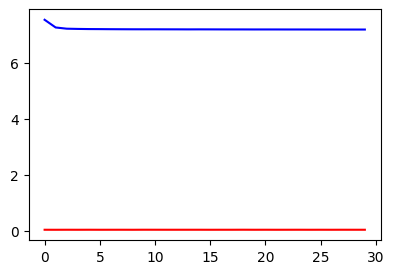

In [ ]:
figure = plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
acc = history.history["accuracy"]
loss = history.history["loss"]

plt.plot(acc, c='r')
plt.plot(loss, c="b")
plt.show()

## Poem Generation

In [ ]:
initial_text =  "Oh toi, mon "
total_word_gen = 500
seq = tokenizer.texts_to_sequences([initial_text])[0]
pad_seq = np.array(pad_sequences([seq], maxlen=X.shape[1],  truncating="post", padding="post"))
pad_seq.shape

(1, 363)

In [ ]:
a= model.predict(pad_seq)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
np.argmax(a)

1

In [ ]:
tokenizer.index_word[np.argmax(a)]

'et'

### With temperature

In [ ]:
initial_text =  "Oh toi, mon ame abstiens toi "
total_word_gen = 500

poem = initial_text
for i in range(total_word_gen):
  #print(initial_text)
  seq = tokenizer.texts_to_sequences([initial_text])[0]
  pad_seq = np.array(pad_sequences([seq], truncating="post", maxlen=X.shape[1], padding="post"))
  predict = model.predict(pad_seq, verbose=0)

  #convert predict seq to word:
  predicted_word = tokenizer.index_word[np.argmax(predict)]
  poem += " "+predicted_word
  initial_text = " ".join(poem.split(' ')[-1])


print(poem)

Oh toi, mon ame abstiens toi  et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et et e

### Using temperature

In [ ]:
def sample_with_temperature(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Génération de texte
seed_text = "Oh toi, mon âme"
next_words = 500

poem = seed_text
line = ""
for i in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='post', truncating="post")
    preds = model.predict(token_list, verbose=0)[0]

    predicted_word_index = sample_with_temperature(preds, temperature=0.7)
    predicted_word = tokenizer.index_word[predicted_word_index+1]

    line += " " + predicted_word
    if i%6 ==0 :
      poem+= line + "\n"
      line = ""
    seed_text += " " + predicted_word
    seed_text = seed_text.split(' ', 1)[-1]

print(poem)


Oh toi, mon âme le
 destin cette on se qui que
 la en dans monde les un
 tu le de me le du
 mon les passaient la des que
 tes de project les de de
 comme des un the de peine
 du use grande frites un des
 à comme ces tu les son
 dont des nuit vin use mains
 les me tu qui lune le
 le dans qui un visite la
 le l'amante pesé ma chair d'un
 le des de le ces j'ai
 se de un la les des
 notre qui le qui elle la
 le de de leurs bassin un
 ne le dans icarie absents la
 mer se les sois the à
 un que org de près fins
 sa tombe je fer en qui
 ses de les l'eau de le
 du of le de qui de
 la de mon the ce je
 de sur coeur la soleil à
 centenaire laid il on un tm
 que que la un les qui
 vaincu me tout les de pour
 de en la la tu parfum
 comme de imprégnés doux plein qui
 le this le tm le toi
 large de gutenberg des de le
 de qui poison le a toujours
 les d'un on le pour les
 de vers cyprès tu droit près
 pris envie te absolument le le
 dans comme qui sors part cognant
 la plus ma de vin d'un
 les sais 